# Import Library

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from posix import stat

# Data Loading

In [4]:
# membaca file delimeter ;
df = pd.read_csv('/content/Tugas 2 STDA4101-2024.1.csv', delimiter=';')
df.head()

,AGE,Y,Unnamed: 2,Unnamed: 3
0,59,"151,00",NaN,NaN
1,48,"75,00",NaN,NaN
2,72,"141,00",NaN,NaN
3,24,"206,00",NaN,NaN
4,50,"135,00",NaN,NaN


# Data Wrangling

In [5]:
# Menghapus kolom NaN
df = df.drop(columns=["Unnamed: 2", "Unnamed: 3"])

In [6]:
# Memeriksa missing values
df.isnull().sum()

,0
AGE,0
Y,0


In [7]:
# Memeriksa duplikasi
df.duplicated().sum()

0

In [12]:
# Ganti koma dengan titik dan ubah menjadi numerik
df['Y'] = df['Y'].str.replace(',', '.').astype(float)

# EDA

In [8]:
# Melakukan analisis statistik deskriptif
df.describe()

,AGE
count,100.000000
mean,45.820000
std,13.688733
min,19.000000
25%,35.000000
50%,47.500000
75%,58.000000
max,72.000000


# Menjawab Soal Tugas 2

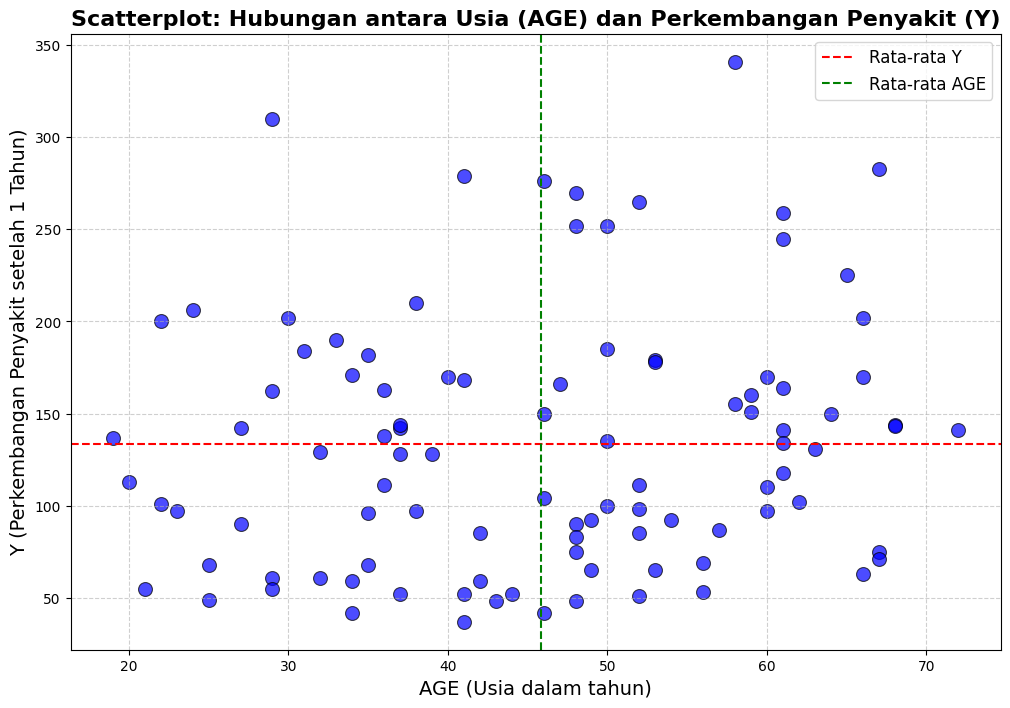

In [13]:
# Soal 1
# Membuat Visualisasi data bivariat(hubungan antara dua variabel) menggunakan Scatterplot
plt.figure(figsize=(12, 8))

sns.scatterplot(
    x=df['AGE'], y=df['Y'],
    color='blue', alpha=0.7, s=100, edgecolor='black'
)

plt.axhline(df['Y'].mean(), color='red', linestyle='--', label='Rata-rata Y')
plt.axvline(df['AGE'].mean(), color='green', linestyle='--', label='Rata-rata AGE')

plt.title('Scatterplot: Hubungan antara Usia (AGE) dan Perkembangan Penyakit (Y)', fontsize=16, fontweight='bold')
plt.xlabel('AGE (Usia dalam tahun)', fontsize=14)
plt.ylabel('Y (Perkembangan Penyakit setelah 1 Tahun)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='best', fontsize=12)

plt.show()

Persamaan Regresi Linear: Y = 100.56 + 0.72 * AGE


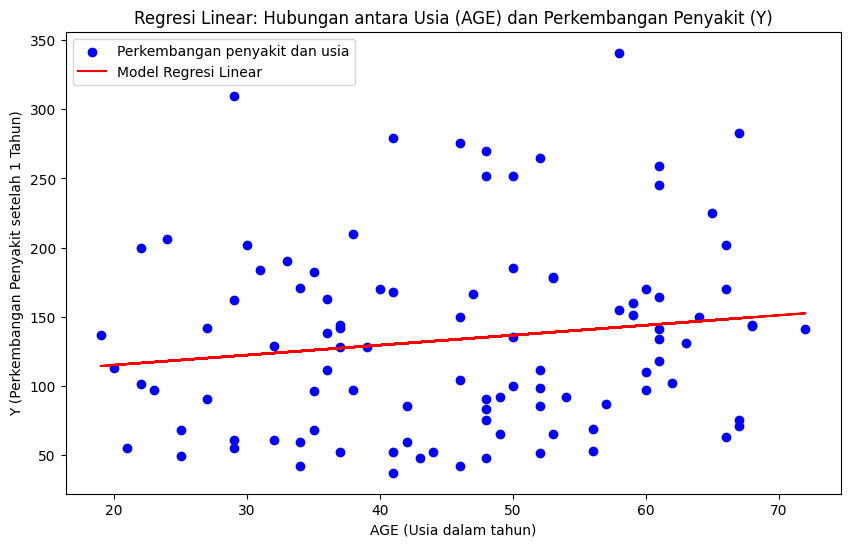

In [16]:
# Soal 2
# Tentukan model persamaan regresi linear

X = df[['AGE']]
y = df['Y']

model = LinearRegression()
model.fit(X, y)

# Menampilkan Intercept dan Koefisien
a = model.intercept_
b = model.coef_[0]
print(f'Persamaan Regresi Linear: Y = {a:.2f} + {b:.2f} * AGE')

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Perkembangan penyakit dan usia')
plt.plot(X, model.predict(X), color='red', label='Model Regresi Linear')

# Menambahkan judul dan label sumbu
plt.title('Regresi Linear: Hubungan antara Usia (AGE) dan Perkembangan Penyakit (Y)')
plt.xlabel('AGE (Usia dalam tahun)')
plt.ylabel('Y (Perkembangan Penyakit setelah 1 Tahun)')
plt.legend()
plt.show()

Y = a+b(AGE)
Y =100.56 + 0.72 * AGE
---


dimana a (Intercept atau konstanta)
dan b (Slope atau koefisien regresi)
terdapat kenaikan.


---bisa kita lihat terdapat kenaikan yang berarti dalam grafik tersebut menunjukkan adanya korelasi positif antara usia (AGE) dan perkembangan penyakit (Y). Yang berarti, seiring bertambahnya usia, perkembangan penyakit juga meningkat secara konsisten.



In [ ]:
# Soal 3
# Buatlah rumusan masalah asosiatif berdasarkan visual data yang ada



**1. Apakah terdapat hubungan yang signifikan antara usia individu dengan perkembangan penyakit setelah satu tahun amatan?**



In [18]:
# Soal 4
# Berikan ulasan Anda tentang model dan hasil yang akan dicapai

# Menghitung Koefisien Korelasi Pearson untuk menjawab soal 3
correlation_matrix = df.corr()
correlation_coefficient = correlation_matrix.loc['AGE', 'Y']

print(f'Koefisien Korelasi Pearson = {correlation_coefficient:.2f}')

#mencari p-valuenya (probabilitasnya)
stat, p = stats.pearsonr(df['AGE'], df['Y'])

print('p-value = %.3f' % (p))


Koefisien Korelasi Pearson = 0.14
p-value = 0.157


# Insight

kita sudah mencari nilai koefisien korelasi person dan mencari nilai p-valuenya

---

dimana Koefisien Korelasi = 0.14,dan p-value = 0.157

---

Nilai 0.14 menunjukkan adanya hubungan yang sangat lemah antara dua variabel, yaitu AGE (usia) dan Y (perkembangan penyakit).Koefisien korelasi ini mendekati 0, yang berarti hubungan antara kedua variabel sangat lemah, hampir tidak ada hubungan linier yang jelas.Sedangkan

---

Nilai p = 0.157 ,maka dari itu karena > 0,05 menunjukkan ketidak-signifikannya hubungan antara kedua variabel

